In [1]:
!pip3 install https://github.com/s4w3d0ff/python-poloniex/archive/v0.4.6.zip

     / 40kB 365kB/s
  Running setup.py bdist_wheel for poloniex ... done
  Stored in directory: /private/var/folders/vy/5k8fm_d154l77ln625np7dx40000gn/T/pip-ephem-wheel-cache-zqp8uwro/wheels/59/c3/48/ac9242eb90b36a6c88082c1b319f9b14324b94c3c1152fdcff
Successfully built poloniex


In [2]:
import poloniex

In [4]:
import time

# poloniex APIの準備
polo = poloniex.Poloniex()

#５分間隔（サンプリング間隔300秒）で100日分読み込む
chart_data = polo.returnChartData('BTC_ETH', period=300, start=time.time()-polo.DAY*100, end=time.time())

In [5]:
chart_data

[{'close': '0.07842553',
  'date': 1526120400,
  'high': '0.07853499',
  'low': '0.07827001',
  'open': '0.07835221',
  'quoteVolume': '163.64951749',
  'volume': '12.82795784',
  'weightedAverage': '0.07838677'},
 {'close': '0.078705',
  'date': 1526120700,
  'high': '0.07889161',
  'low': '0.07845001',
  'open': '0.07853499',
  'quoteVolume': '11.84777758',
  'volume': '0.93250939',
  'weightedAverage': '0.07870753'},
 {'close': '0.07889499',
  'date': 1526121000,
  'high': '0.07897999',
  'low': '0.07865002',
  'open': '0.078715',
  'quoteVolume': '25.14661259',
  'volume': '1.98108731',
  'weightedAverage': '0.07878147'},
 {'close': '0.078872',
  'date': 1526121300,
  'high': '0.07897485',
  'low': '0.078655',
  'open': '0.07865524',
  'quoteVolume': '6.80425228',
  'volume': '0.53625915',
  'weightedAverage': '0.07881235'},
 {'close': '0.07900184',
  'date': 1526121600,
  'high': '0.07900184',
  'low': '0.07871026',
  'open': '0.07895999',
  'quoteVolume': '89.02986866',
  'volume

In [6]:
import pandas as pd

df = pd.DataFrame(chart_data)

In [8]:
df.head(10)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0.07842553,1526120400,0.07853499,0.07827001,0.07835221,163.64951749,12.82795784,0.07838677
1,0.078705,1526120700,0.07889161,0.07845001,0.07853499,11.84777758,0.93250939,0.07870753
2,0.07889499,1526121000,0.07897999,0.07865002,0.078715,25.14661259,1.98108731,0.07878147
3,0.078872,1526121300,0.07897485,0.078655,0.07865524,6.80425228,0.53625915,0.07881235
4,0.07900184,1526121600,0.07900184,0.07871026,0.07895999,89.02986866,7.02773394,0.07893681
5,0.07910184,1526121900,0.07910184,0.07892742,0.07900184,120.37143834,9.51918813,0.07908178
6,0.07939998,1526122200,0.07939999,0.07910183,0.07910184,141.49453828,11.22554605,0.07933554
7,0.07929026,1526122500,0.07939999,0.07922152,0.07939994,149.33889268,11.85605704,0.07939028
8,0.079625,1526122800,0.079625,0.07929502,0.07929502,146.589933,11.65257085,0.07949093
9,0.07922202,1526123100,0.079625,0.07922177,0.079625,49.51317611,3.93336288,0.07944073


## 移動平均の算出

In [14]:
#短期線：窓幅1日（５分×12×24）
data_s = pd.rolling_mean(df['close'], 12 * 24)

#長期線：窓幅5日（５分×12×24×5）
data_l = pd.rolling_mean(df['close'], 12 * 24 * 5)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=288,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()
  """


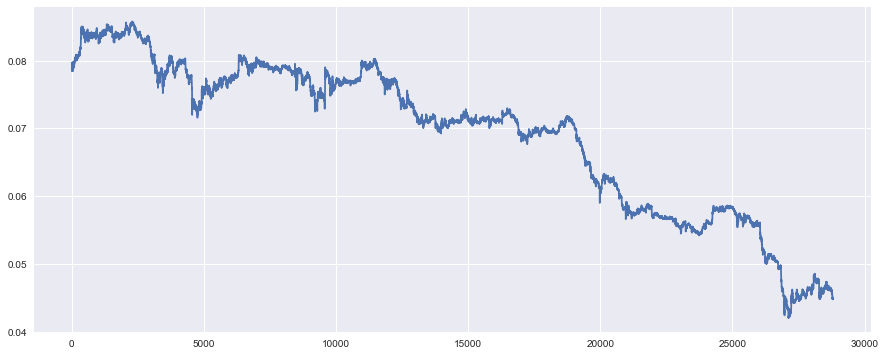

In [17]:
# matplotlibの読み込み（エラーが出た時はpip or pip3でインストール）
import matplotlib.pyplot as plt

# 一番簡単なプロット
plt.plot(df['close'])
plt.show()

In [16]:
# 描画を綺麗に表示する
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

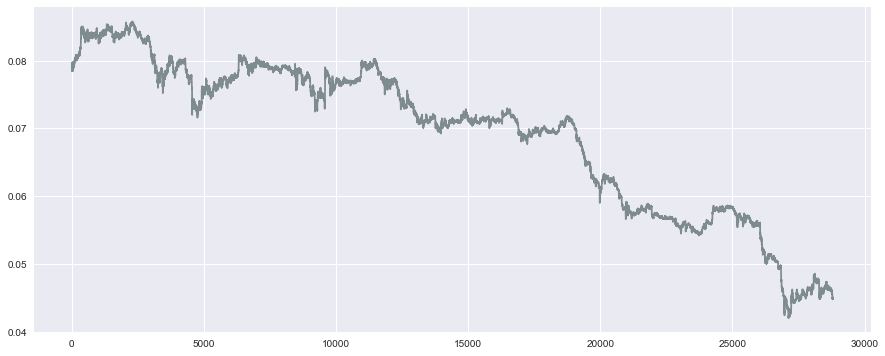

In [18]:
# プロットの色を指定（color）
plt.plot(df['close'], color='#7f8c8d')
plt.show()

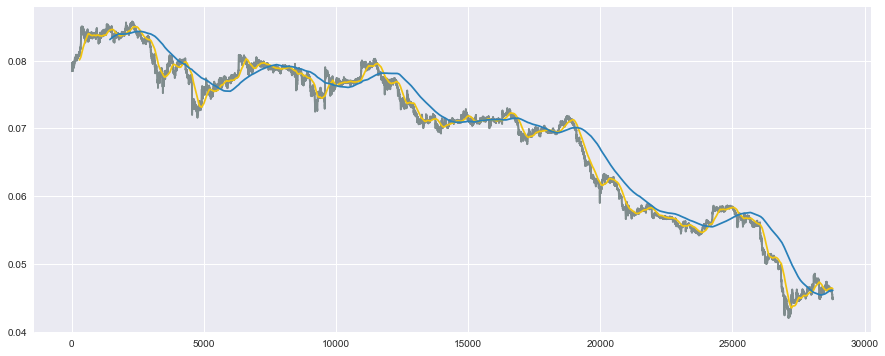

In [20]:
# 短期線と長期線もプロット
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f') # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()

In [21]:
import numpy as np

#API経由では文字列（String型）として受け取るため、float型に変換しておく
# また、Chainerではfloat32を推奨しているため、こちらに合わせておく
data = df['close'].astype(np.float32)

# データを入力変数xと出力変数tに切り分け
x, t = [], []
N = len(data)
M =30 # 入力変数の数：直近30サンプルを使用
for n in range(M, N):
    # 入力変数と出力変数の切り分け
    _x = data[n-M: n]
    _t = data[n]
    #計算用リスト（x, t）に追加していく
    x.append(_x)
    t.append(_t)

In [22]:
# numpyの形式に変換する
x = np.array(x)
t = np.array(t).reshape(len(t), 1)

In [26]:
#70%を訓練用、30%を検証用
N_train = int(N * 0.7)
x_train, x_test = x[:N_train], x[N_train:]
t_train, t_test = t[:N_train], t[N_train:]

In [27]:
from sklearn import linear_model

#重回帰分析モデルの宣言
reg = linear_model.LinearRegression()

#訓練データを使ったモデルの学習
reg.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# 訓練データ
reg.score(x_train, t_train)

0.99946889850080389

In [31]:
# テストデータ
reg.score(x_test, t_test)

0.99967751969810303

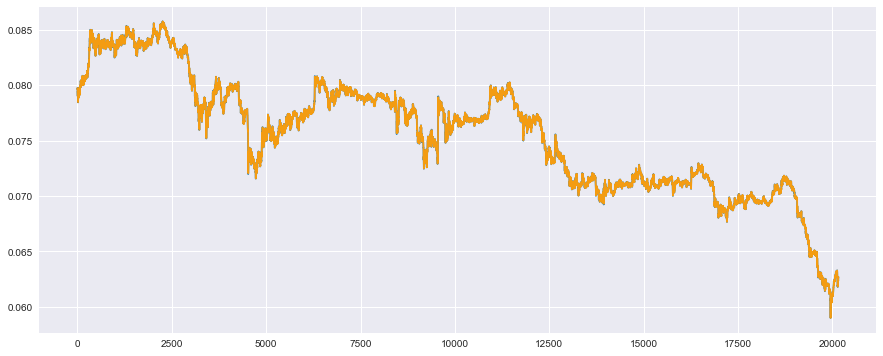

In [32]:
# 訓練データ
plt.plot(t_train, color='#2980b9')  # 実測値は青色
plt.plot(reg.predict(x_train), color='#f39c12')  # 予測値はオレンジ
plt.show()

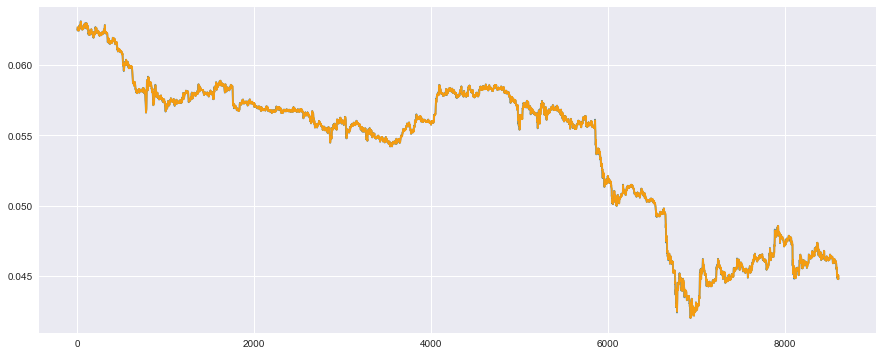

In [33]:
# 検証データ
plt.plot(t_test, color='#2980b9')  # 実測値は青色
plt.plot(reg.predict(x_test), color='#f39c12')  # 予測値はオレンジ
plt.show()

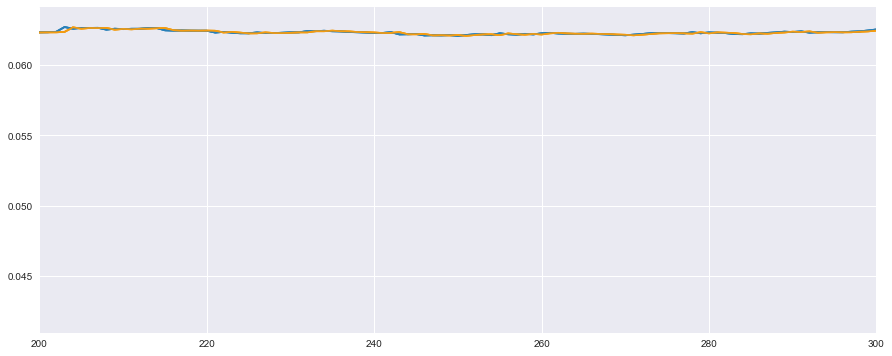

In [37]:
# 検証用の一部を見てみる
plt.plot(t_test, color='#2980b9')  # 実測値は青色
plt.plot(reg.predict(x_test), color='#f39c12')  # 予測値はオレンジ
plt.xlim(200, 300)
plt.show()

- 一見うまく予測できているように見えるが、単純に１サンプルだけずれているだけ
- １サンプル前の値を予測値として出力していただけ

## なぜこうなるのか

- 時系列データではランダムウォークと呼ばれる現象が起きている
- 前サンプルに対して、その次のサンプルで値段が上がるか下がるかの確率で言うと、5:5
- 平均値で考えると、「次の価格は上がりも下がりもしない」が機械学習的にはベスト

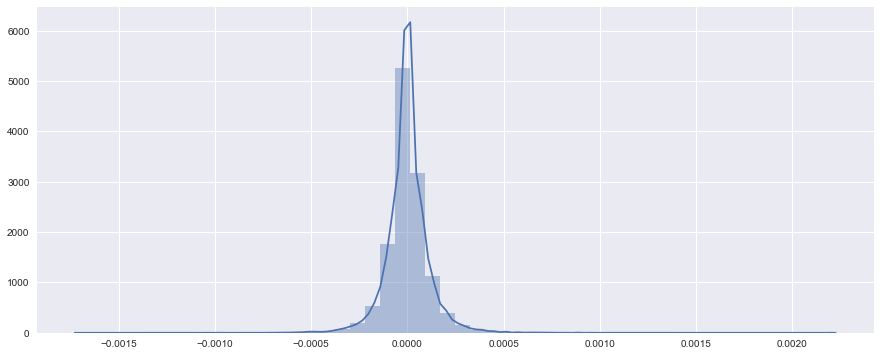

In [38]:
# 前日との価格の差分をとる
t_diff = t[:-1] - t[1:]

sns.distplot(t_diff)
plt.show()

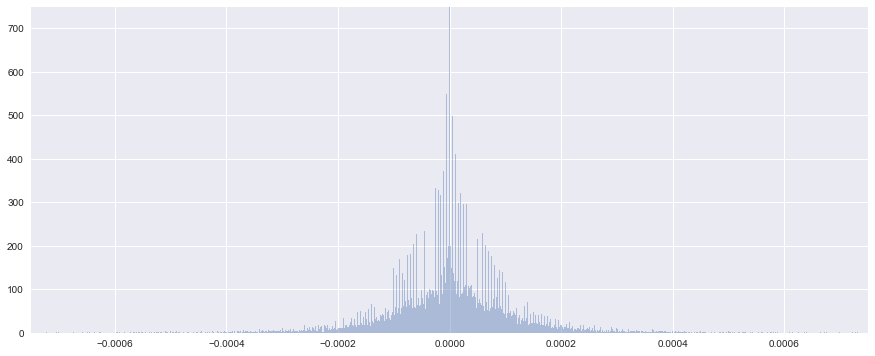

In [40]:
# binの数を増やし、kde(ガウシアンカーネル密度比推定)のプロットをオフ
sns.distplot(t_diff, bins=3000, kde=False)
plt.xlim(-0.00075, 0.00075)
plt.ylim(0, 750)
plt.show()

- 重回帰分析をはじめとした機械学習の手法では、そもそも、データは各時刻ごとに独立して真の分布から生成されると仮定している
- つまり、前時刻のデータが次の時刻のデータに影響を与えないということを前提としている
- 前のデータが次のデータに影響を与える場合でも予測ができる仕組み：隠れマルコフモデル

## RNN(Recurrent Neural Network)

- 隠れマルコフモデルのディープラーニング版
- よく使われるのがLSTM（Long Short-Term Memory）

In [53]:
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import Chain, Variable, datasets, optimizers
from chainer import report, training
from chainer.training import extensions

In [42]:
!pip3 install chainer

    100% |████████████████████████████████| 409kB 3.7MB/s ta 0:00:011
    100% |████████████████████████████████| 1.2MB 6.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for chainer ... done
  Stored in directory: /Users/masahiro/Library/Caches/pip/wheels/8a/ef/b0/e67e0555c4d520566d6565d9634ecb7fbb1594758236bb7b40
  Running setup.py bdist_wheel for filelock ... done
  Stored in directory: /Users/masahiro/Library/Caches/pip/wheels/35/ba/67/4cc48738870c3b54f9e3b5d78bf9de130befb70c1d359faf8b
Successfully built chainer filelock


In [77]:
class LSTM(Chain):
    # モデルの構造を明記
    def __init__(self, n_units, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.LSTM(None, n_units) # LSTMの層を追加
            self.l2 = L.Linear(None, n_output)

    # LSTM内で保持する値をリセット
    def reset_state(self):
        self.l1.reset_state()

    # 損失関数の計算
    def __call__(self, x, t, train=True):
        y = self.predict(x, train)
        loss = F.mean_squared_error(y, t)
        if train:
            report({'loss': loss}, self)
        return loss

    # 順伝播の計算
    def predict(self, x, train=False):
        h1 = self.l1(x)
        h2 = self.l2(h1)
        return h2

In [78]:
class LSTMUpdater(training.StandardUpdater):
    def __init__(self, data_iter, optimizer, device=None):
        super(LSTMUpdater, self).__init__(data_iter, optimizer, device=None)
        self.device = device

    def update_core(self):
        data_iter = self.get_iterator("main")
        optimizer = self.get_optimizer("main")

        batch = data_iter.__next__()
        x_batch, y_batch = chainer.dataset.concat_examples(batch, self.device)

        # ↓ ここで reset_state() を実行できるようにしている
        optimizer.target.reset_state()

        # その他は時系列系の更新と同じ
        optimizer.target.cleargrads()
        loss = optimizer.target(x_batch, y_batch)
        loss.backward()
        # 時系列ではunchain_backward()によって計算効率が上がるそう
        loss.unchain_backward()
        optimizer.update()

In [79]:
# chainer用のデータセットでメモリに乗る程度であれば、list(zip(...))を推奨
# ↑ PFNの開発者推奨の方法
train = list(zip(x_train, t_train))
test  = list(zip(x_test,  t_test))

- ここまでで準備が完了

以下の流れで実装

- モデルの宣言
- optimizerの定義：最適化の手法を選び、モデルと紐付ける
- iteratorsの定義：データセットをバッチ毎に切り分ける
- updaterの定義：更新規則等をまとめる
- trainerの定義：トレーニングの実行に関する設定をまとめる

In [80]:
# 再現性確保
np.random.seed(1)

In [83]:
# モデルの宣言
model = LSTM(30, 1)

# optimizerの定義
optimizer = optimizers.Adam()  # 最適化アルゴリズムはAdamを使用
optimizer.setup(model)

# iteratorの定義
batchsize = 20
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

# updaterの定義
updater = LSTMUpdater(train_iter, optimizer)

# trainerの定義
epoch = 30
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')
# trainerの拡張機能
trainer.extend(extensions.Evaluator(test_iter, model))　　# 評価データで評価
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))　　# 学習結果の途中を表示する
# １エポックごとに、trainデータに対するlossと、testデータに対するlossを出力させる
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

SyntaxError: invalid character in identifier (<ipython-input-83-1eac72718549>, line 20)

In [84]:
trainer.run()

Exception in main training loop: extension LogReport not found
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/chainer/training/trainer.py", line 309, in run
    entry.extension(self)
  File "/anaconda/lib/python3.6/site-packages/chainer/training/extensions/print_report.py", line 54, in __call__
    log_report = trainer.get_extension(log_report)
  File "/anaconda/lib/python3.6/site-packages/chainer/training/trainer.py", line 263, in get_extension
    raise ValueError('extension %s not found' % name)
Will finalize trainer extensions and updater before reraising the exception.


ValueError: extension LogReport not found

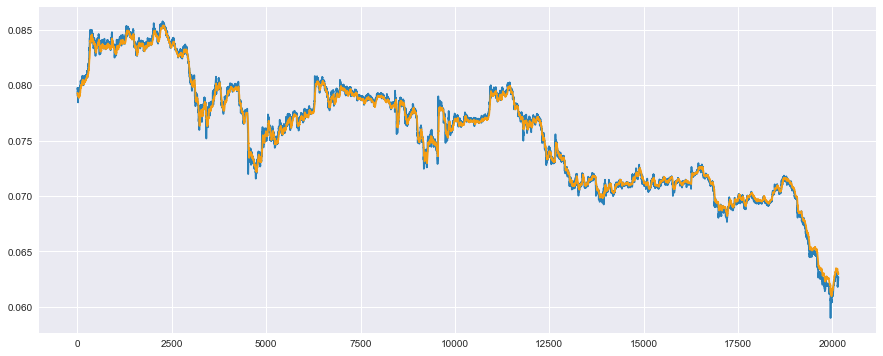

In [85]:
# 予測値の計算
model.reset_state()
y_train = model.predict(Variable(x_train)).data

# プロット
plt.plot(t_train, color='#2980b9') # 実測値は青色
plt.plot(y_train, color='#f39c12') # 予測値はオレンジ
plt.show()

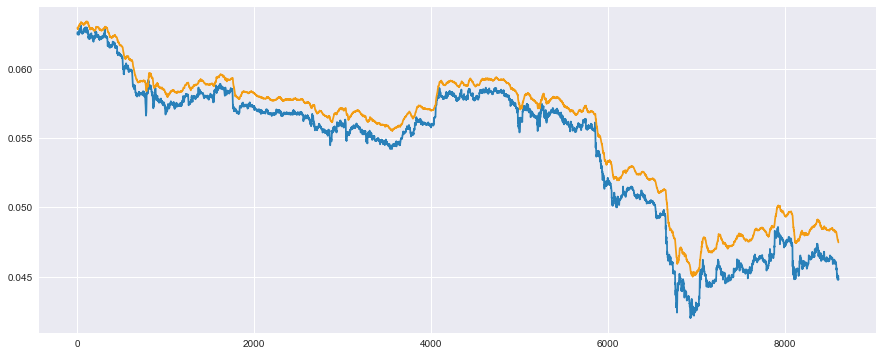

In [86]:
# 予測値の計算
model.reset_state()
y_test = model.predict(Variable(x_test)).data

# プロット
plt.plot(t_test, color='#2980b9')  # 実測値は青色
plt.plot(y_test, color='#f39c12')  # 予測値はオレンジ
plt.show()

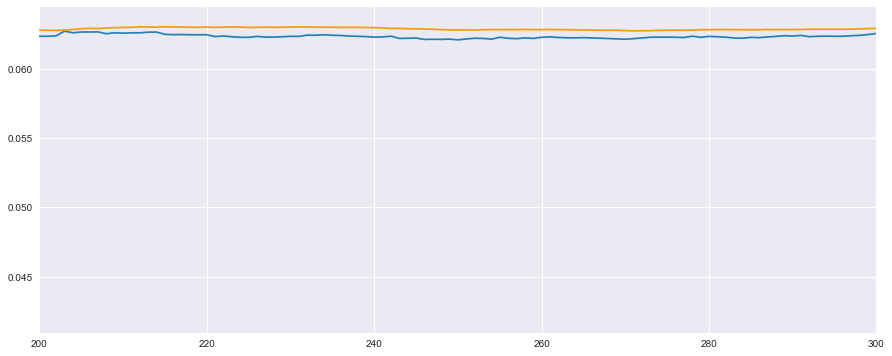

In [87]:
# 検証用の一部を見てみる
plt.plot(t_test, color='#2980b9')  # 実測値は青色
plt.plot(y_test, color='#f39c12')  # 予測値はオレンジ
plt.xlim(200, 300)  # 特徴がわかりやすい一部
plt.show()
